## Heart Disease
El conjunto de datos "Heart Disease" contiene información médica sobre pacientes que se sometieron a pruebas para detectar enfermedades cardíacas. Estos datos fueron recopilados en un estudio realizado en el Instituto de Aprendizaje Automático de la Universidad de California, Irvine (UCI).

Atributos:
<ul>
<li>age: Edad del paciente (numérico).</li>
<li>sex: Género del paciente (0 = mujer, 1 = hombre).</li>
<li>cp: Tipo de dolor en el pecho (0 = típico angina, 1 = angina atípica, 2 = dolor no anginal, 3 = asintomático).</li>
<li>trestbps: Presión arterial en reposo (en mm Hg) (numérico).</li>
<li>chol: Colesterol sérico en mg/dl (numérico).</li>
<li>fbs: Nivel de azúcar en sangre en ayunas > 120 mg/dl (0 = falso, 1 = verdadero).</li>
<li>restecg: Resultados electrocardiográficos en reposo (0 = normal, 1 = con anormalidad de la onda ST-T, 2 = hipertrofia ventricular izquierda probable o definitiva).</li>
<li>thalach: Frecuencia cardíaca máxima alcanzada (numérico).</li>
<li>exang: Angina inducida por ejercicio (0 = no, 1 = sí).</li>
<li>oldpeak: Depresión del segmento ST inducida por el ejercicio en relación con el descanso (numérico).</li>
<li>slope: Pendiente del segmento ST de ejercicio máximo (0 = ascendente, 1 = plano, 2 = descendente).</li>
<li>ca: Número de vasos principales (0-3) coloreados por fluoroscopia (numérico).</li>
<li>thal: Enfermedad de Talasemia (3 = normal, 6 = defecto fijo, 7 = defecto reversible).</li>
<li>target: clase objetivo. Presencia de enfermedad cardíaca (0 = no, 1 = sí).</li>
</ul>

Se puede obtener en https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical


## Carga de datos y preparación

In [2]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/proyecto-tensorflow/buenos/heart.csv'

Mounted at /content/drive


In [3]:
# Cargar el conjunto de datos, teniendo en cuenta el encabezado
data = pd.read_csv(path, header=0)

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# Identificar filas con valores nulos
rows_with_nans = data[data.isnull().any(axis=1)]
rows_with_nans

# Eliminar filas con valores faltantes
data = data.dropna()

In [6]:
# Ver dimensiones
data.shape

(1025, 14)

In [7]:
# Mostrar los valores diferentes de la clase target
unique_values = data['target'].unique()
print(f"Valores diferentes en la clase 'target': {unique_values}")

Valores diferentes en la clase 'target': [0 1]


In [8]:
# División de características y etiquetas
X = data.drop('target', axis=1)
y = data['target']

In [9]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Antes de la transformación
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [11]:
X_train.shape

(820, 13)

In [12]:
# Preprocesamiento de variables numéricas y categóricas
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Aplicar diferentes transformaciones a diferentes columnas de un DataFrame. A las columnas numéricas se las aplica una estandarización
# Las columnas categóricas se las aplica OneHot que crea varias columnas para cada atributo, marcando en la columna correspondiente el valor original del atributo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [13]:
# Preprocesar los datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [14]:
# Después de la transformación
X_train

array([[-0.58584022, -0.77945357, -1.93503098, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.05147737,  2.74173173,  1.61063407, ...,  0.        ,
         1.        ,  0.        ],
       [-0.04006769, -1.34738668,  0.44217627, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.36753121,  0.46999928,  1.08684264, ...,  0.        ,
         0.        ,  1.        ],
       [-1.24076726, -1.23380006, -0.68598988, ...,  0.        ,
         0.        ,  1.        ],
       [-0.2583767 , -1.12021343, -0.30321922, ...,  0.        ,
         1.        ,  0.        ]])

In [15]:
# Obtener el número de características después del preprocesamiento. 30 porque aplica onehot
input_shape = X_train.shape[1]
input_shape

30

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 30)
(820,)
(205, 30)
(205,)


## Modelo básico

In [17]:
# Construir el modelo
# Sequential es la clase en Keras que permite crear un modelo secuencial, lo que significa que las capas del modelo se apilan una tras otra en un solo flujo lineal
# Dense es una clase que representa una capa totalmente conectada
# Units es el número de neuronas en la capa que es el primer parametro
# Activation: la función de activación que se aplica a la salida de las neuronas en esta capa
# -relu (Rectified Linear Unit): max(0, x). Es una función no lineal
# -sigmoid: 1 / (1 + exp(-x)). Es útil para la salida de una red neuronal que realiza clasificación binaria, ya que transforma la salida en un valor entre 0 y 1.
# -softmax': Específica para problemas de clasificación multiclase. Convierte las salidas en probabilidades que suman a 1.
# -Para problemas de regresión, no se suele utilizar ninguna función de activación específica.
# input_shape: La forma de los datos de entrada. Solo se especifica en la primera capa del modelo. Se especifica en forma de tupla
# Se utilizan las potencias de 2 debido a las eficiencias computacionales que pueden brindar, especialmente en hardware moderno como GPUs.
# Respecto a las funciones de activación, no es obligatorio utilizar la misma función de activación en todas las capas
model = Sequential([
    # Primera capa con 64 neuronas y activación ReLU
    Dense(64, activation='relu', input_shape=(input_shape,)),
    # Segunda capa con 32 neuronas y activación ReLU
    Dense(32, activation='relu'),
    # Capa de salida con activación Sigmoid para clasificación binaria
    Dense(1, activation='sigmoid')
])

In [18]:
# Compilar el modelo
# optimizer: especifica el algoritmo que se utilizará para ajustar los pesos del modelo durante el entrenamiento. Ejemplos comunes son adam, sgd, rmsprop
# loss: es la función de pérdida que se utilizará para evaluar qué tan bien el modelo está realizando la tarea de aprendizaje. La función de pérdida calcula la diferencia entre las predicciones del modelo y las etiquetas reales. Se utiliza binary_crossentropy para problemas de clasificacion binaria
# metrics: son las métricas que se evaluarán durante el entrenamiento y la evaluación del modelo.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Entrenar el modelo
# epochs: define el número de veces que el algoritmo de entrenamiento recorrerá todo el conjunto de datos de entrenamiento. Cada pasada completa del conjunto de datos se llama una "época".
# batch_size: define el número de muestras que se procesarán antes de actualizar los parámetros del modelo.
# validation_split: es la fracción del conjunto de datos de entrenamiento que se reservará para validar el modelo durante el entrenamiento. Este conjunto de datos de validación se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 3s 20ms/step - loss: 0.6408 - accuracy: 0.6799 - val_loss: 0.6020 - val_accuracy: 0.7134
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4913 - accuracy: 0.8216 - val_loss: 0.4928 - val_accuracy: 0.7927
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.3798 - accuracy: 0.8506 - val_loss: 0.4185 - val_accuracy: 0.8232
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.8735 - val_loss: 0.3871 - val_accuracy: 0.8780
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 0.2891 - accuracy: 0.8857 - val_loss: 0.3694 - val_accuracy: 0.8780
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.2677 - accuracy: 0.8948 - val_loss: 0.3637 - val_accuracy: 0.8720
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 0.2513 - accuracy: 0.9009 - val_loss: 0.3645 - val_accuracy: 0.8537
Epoch 8/50
21/21 [=

In [21]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


7/7 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.9610
Test Accuracy: 0.9609755873680115


In [22]:
# El nuevo dato es un DataFrame con una nueva observación
new_data = pd.DataFrame({
    'age': [54],
    'sex': [1],
    'cp': [0],
    'trestbps': [130],
    'chol': [246],
    'fbs': [0],
    'restecg': [1],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [1.9],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

# Preprocesar el nuevo dato
new_data_processed = preprocessor.transform(new_data)

In [23]:
# Realizar la predicción
prediction = model.predict(new_data_processed)
print(prediction)

# Interpretar la predicción
# La salida del modelo es un valor de probabilidad. Para problemas de clasificación binaria, normalmente se interpreta como Clase 1 si la probabilidad es mayor que 0.5 y Clase 0 en caso contrario.
predicted_class = (prediction > 0.5).astype(int)
print(f'Predicted class: {predicted_class[0][0]}')

1/1 [==============================] - 0s 83ms/step
[[0.90853214]]
Predicted class: 1


In [24]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_probs = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [25]:
# Convertir las probabilidades a clases binarias
y_pred = (y_pred_probs > 0.5).astype(int)

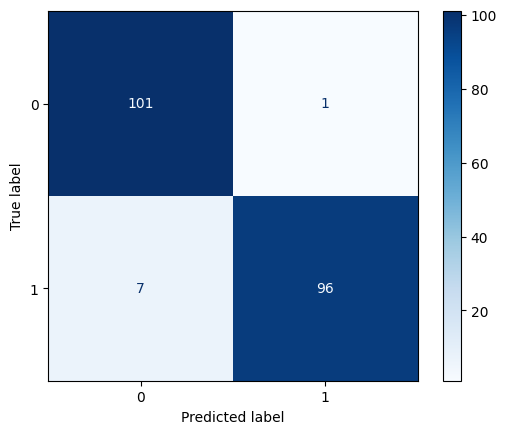

In [26]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.show()

In [27]:
# Guardar el modelo
model.save('heart_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Cargar el modelo
loaded_model = load_model('heart_disease_model.h5')

In [29]:
# Evaluar el modelo cargado
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(X_test, y_test)
print(f'Loaded model test accuracy: {loaded_test_acc}')

7/7 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9610
Loaded model test accuracy: 0.9609755873680115


## Red neuronal con más capas

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 30)
(820,)
(205, 30)
(205,)


In [31]:
# Crear un modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [32]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 3s 38ms/step - loss: 0.6786 - accuracy: 0.6280 - val_loss: 0.6636 - val_accuracy: 0.7317
Epoch 2/50
21/21 [==============================] - 0s 13ms/step - loss: 0.5993 - accuracy: 0.8034 - val_loss: 0.5690 - val_accuracy: 0.7866
Epoch 3/50
21/21 [==============================] - 0s 10ms/step - loss: 0.4511 - accuracy: 0.8384 - val_loss: 0.4421 - val_accuracy: 0.8415
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.3235 - accuracy: 0.8887 - val_loss: 0.3884 - val_accuracy: 0.8476
Epoch 5/50
21/21 [==============================] - 0s 14ms/step - loss: 0.2601 - accuracy: 0.9070 - val_loss: 0.3805 - val_accuracy: 0.8598
Epoch 6/50
21/21 [==============================] - 0s 8ms/step - loss: 0.2337 - accuracy: 0.9070 - val_loss: 0.3876 - val_accuracy: 0.8476
Epoch 7/50
21/21 [==============================] - 0s 12ms/step - loss: 0.2112 - accuracy: 0.9223 - val_loss: 0.3888 - val_accuracy: 0.8537
Epoch 8/50
21/

In [34]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

7/7 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9707
Test Accuracy: 0.9707317352294922


## Red neuronal con parámetros de kernel

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 30)
(820,)
(205, 30)
(205,)


In [36]:
# Crear un modelo secuencial
# kernel_initializer: Este parámetro especifica el método para inicializar los pesos de la red neuronal. Valores comunes son 'glorot_uniform', 'he_normal',
# kernel_regularizer: Se utiliza para aplicar penalizaciones a los pesos de la red neuronal durante el entrenamiento
# dropout: Esta capa se puede agregar entre capas densas para ayudar a prevenir el sobreajuste. dropout apaga aleatoriamente un porcentaje de unidades (neuronas) durante el entrenamiento
model = Sequential([
    # Para aplicar una regularización L2 a los pesos de la primera capa densa
    Dense(64, activation='relu', input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.01)),
    # Se agrega una capa de Dropout con una tasa del 50% para ayudar a prevenir el sobreajuste
    Dropout(0.5),
    # Para inicializar los pesos de la segunda capa densa con el método 'he_normal'
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid')
])

In [37]:
# Compilar el modelo
# Compilamos el modelo con el optimizador RMSprop, la función de pérdida mean_squared_error, y la métrica AUC.
model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=[AUC()])

In [38]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.3)


Epoch 1/50
36/36 [==============================] - 1s 11ms/step - loss: 0.5436 - auc: 0.7756 - val_loss: 0.4575 - val_auc: 0.8883
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 0.4099 - auc: 0.8795 - val_loss: 0.3569 - val_auc: 0.9150
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 0.3342 - auc: 0.8936 - val_loss: 0.2901 - val_auc: 0.9241
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 0.2666 - auc: 0.9249 - val_loss: 0.2430 - val_auc: 0.9287
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.2297 - auc: 0.9235 - val_loss: 0.2130 - val_auc: 0.9295
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 0.1942 - auc: 0.9379 - val_loss: 0.1915 - val_auc: 0.9328
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 0.1726 - auc: 0.9429 - val_loss: 0.1732 - val_auc: 0.9347
Epoch 8/50
36/36 [==============================] - 0s 3ms/step - loss: 0.1602 - auc: 0.9

In [39]:
# Evaluar el modelo
test_loss, test_auc = model.evaluate(X_test, y_test)
print(f'Test AUC: {test_auc}')

7/7 [==============================] - 0s 3ms/step - loss: 0.1133 - auc: 0.9431
Test AUC: 0.9430801272392273


## Red neuronal con parámetros de bias

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 30)
(820,)
(205, 30)
(205,)


In [41]:
# Crear un modelo secuencial
# bias_initializer: Similar a kernel_initializer, este parámetro especifica el método para inicializar los sesgos de la red neuronal.
# bias_regularizer: Similar a kernel_regularizer, pero se aplica a los sesgos de la red neuronal.
# activity_regularizer: Se utiliza para aplicar penalizaciones a la actividad de las neuronas de la red neuronal durante el entrenamiento.
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,),
          kernel_regularizer=regularizers.l2(0.01),
          # bias_initializer para inicializar los sesgos de las capas densas. En la primera capa, los sesgos se inicializan como ceros
          bias_initializer='zeros',
          # bias_regularizer para aplicar una regularización L2 a los sesgos de las capas densas. Se aplica regularización L2 con un factor de penalización de 0.01 en ambas capas.
          bias_regularizer=regularizers.l2(0.01),
          # activity_regularizer para aplicar una regularización L2 a la actividad de las neuronas en las capas densas. También se aplica regularización L2 con un factor de penalización de 0.01 en ambas capas.
          activity_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_initializer='he_normal',
          bias_initializer='ones', # En la segunda capa se inicializan como unos
          bias_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

In [42]:
# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.3)

Epoch 1/50
36/36 [==============================] - 2s 14ms/step - loss: 1.7162 - accuracy: 0.7387 - val_loss: 1.4130 - val_accuracy: 0.8496
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 1.3733 - accuracy: 0.8171 - val_loss: 1.2152 - val_accuracy: 0.8780
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 1.2034 - accuracy: 0.8293 - val_loss: 1.0818 - val_accuracy: 0.8862
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 1.0899 - accuracy: 0.8502 - val_loss: 0.9898 - val_accuracy: 0.8821
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.9638 - accuracy: 0.8763 - val_loss: 0.9123 - val_accuracy: 0.8821
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.8960 - accuracy: 0.8815 - val_loss: 0.8540 - val_accuracy: 0.8862
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 0.8473 - accuracy: 0.8763 - val_loss: 0.8092 - val_accuracy: 0.8902
Epoch 8/50
36/36 [=

In [44]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

7/7 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8829
Test Accuracy: 0.8829268217086792


## Red neuronal con más capas

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 30)
(820,)
(205, 30)
(205,)


In [46]:
# Crear un modelo secuencial
# BatchNormalization normaliza la activación de cada neurona en la capa anterior, lo que ayuda a estabilizar y acelerar el proceso de entrenamiento.
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,),
          kernel_regularizer=regularizers.l2(0.01),
          bias_initializer='zeros',
          bias_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_initializer='he_normal',
          bias_initializer='ones',
          bias_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu',
          kernel_regularizer=regularizers.l2(0.01),
          bias_initializer='zeros',
          bias_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [47]:
# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [48]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.3)

Epoch 1/50
36/36 [==============================] - 2s 10ms/step - loss: 4.6007 - accuracy: 0.5575 - val_loss: 2.8531 - val_accuracy: 0.7236
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 3.6703 - accuracy: 0.6638 - val_loss: 2.6923 - val_accuracy: 0.5041
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 3.2444 - accuracy: 0.7021 - val_loss: 2.5245 - val_accuracy: 0.4878
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 2.9235 - accuracy: 0.7247 - val_loss: 2.3479 - val_accuracy: 0.5081
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 2.7127 - accuracy: 0.7160 - val_loss: 2.1623 - val_accuracy: 0.5691
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 2.4593 - accuracy: 0.7422 - val_loss: 1.9871 - val_accuracy: 0.6585
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 2.2451 - accuracy: 0.7456 - val_loss: 1.8509 - val_accuracy: 0.7236
Epoch 8/50
36/36 [=

In [49]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

7/7 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.9122
Test Accuracy: 0.9121951460838318


## Callbacks

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 30)
(820,)
(205, 30)
(205,)


In [51]:
# Configurar el optimizador con una tasa de aprendizaje específica
# Tasa de Aprendizaje (Learning Rate): Controla la magnitud de las actualizaciones de los pesos durante el entrenamiento
optimizer = Adam(learning_rate=0.001)

In [52]:
# Construir la arquitectura de la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [53]:
# Compilar el modelo
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [54]:
# Definir callbacks
# Callbacks: Funciones que se llaman en ciertos puntos durante el entrenamiento, como al final de cada época. Pueden ser útiles para realizar tareas como el almacenamiento de checkpoints, el ajuste dinámico de la tasa de aprendizaje, etc.
# EarlyStopping para detener el entrenamiento si la pérdida en el conjunto de validación deja de disminuir después de cierto número de épocas (patience), y ModelCheckpoint para guardar el modelo con la menor pérdida en el conjunto de validación durante el entrenamiento.
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

In [55]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)
# Validation_data se utiliza para evaluar el rendimiento del modelo en un conjunto de datos de validación después de cada época durante el entrenamiento
# proporciona una forma de monitorear el rendimiento del modelo en datos que no ha visto antes durante el entrenamiento, lo que ayuda a detectar sobreajuste.


Epoch 1/50
26/26 [==============================] - 1s 11ms/step - loss: 0.5755 - accuracy: 0.7902 - val_loss: 0.4960 - val_accuracy: 0.7951
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8683 - val_loss: 0.4244 - val_accuracy: 0.8000
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8829 - val_loss: 0.4070 - val_accuracy: 0.8390
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.8951 - val_loss: 0.3858 - val_accuracy: 0.8293
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 0.2619 - accuracy: 0.8988 - val_loss: 0.3778 - val_accuracy: 0.8390
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 0.2506 - accuracy: 0.9024 - val_loss: 0.3716 - val_accuracy: 0.8537
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.9122 - val_loss: 0.3449 - val_accuracy: 0.8439
Epoch 8/50
26/26 [=

In [56]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9854
Loss: 0.0281564611941576
Accuracy: 0.9853658676147461


## Validación cruzada

In [57]:
print(X.shape)
print(y.shape)

(1025, 13)
(1025,)


In [58]:
# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
print(X_scaled.shape)

(1025, 13)


In [60]:
# Definir la arquitectura del modelo
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [61]:
# Inicializar KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [62]:
# Inicializar lista para almacenar resultados de precisión
accuracy_scores = []

In [63]:
# Realizar validación cruzada
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y compilar el modelo
    model = create_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluar el modelo en los datos de prueba
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

7/7 [==============================] - 0s 2ms/step


In [64]:
accuracy_scores

[0.9853658536585366, 1.0, 1.0, 1.0, 0.9951219512195122]

In [65]:
# Validación cruzada estratificada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

In [66]:
print(X_scaled.shape)
print(y.shape)

(1025, 13)
(1025,)


In [67]:
# Realizar validación cruzada
for train_index, test_index in kf.split(X_scaled,y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y compilar el modelo
    model = create_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluar el modelo en los datos de prueba
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

7/7 [==============================] - 0s 2ms/step


In [68]:
scores

[1.0, 1.0, 1.0, 1.0, 0.9902439024390244]

## Resumen de parámetros
<ul>
<li>Al compilar:</li>
<ul>
<li>Optimizer: 'sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam'</li>
<li>Loss: 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'huber_loss', 'log_cosh'</li>
<li>Metrics: 'accuracy', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error'</li>
</ul>

<li>Al entrenar:</li>
<ul>
<li>Epochs: 10, 50, 100, etc</li>
<li>Batch_size: 16, 32, 64, 128, etc</li>
<li>Callbacks: EarlyStopping, ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau, TensorBoard</li>
</ul>

<li>Red neuronal:</li>
<ul>
<li>Número de capas: 1, 2, 3, etc.</li>
<li>Unidades:  16, 32, 64, 128, 256, etc.</li>
<li>Función de activación: 'relu', 'sigmoid', 'tanh', 'softmax', 'softplus', 'softsign', 'selu', 'elu', 'exponential'</li>
<li>Batch Normalization</li>
<li>Kernel initializer: 'glorot_uniform', 'he_normal', 'he_uniform', 'lecun_normal', 'lecun_uniform', 'random_normal', 'random_uniform', 'truncated_normal', 'variance_scaling'</li>
<li>Kernel regularizer: None, l1(0.01), l2(0.01), l1_l2(l1=0.01, l2=0.01)</li>
<li>Activity regularizer: None, l1(0.01), l2(0.01), l1_l2(l1=0.01, l2=0.01)</li>
<li>Bias initializer: 'zeros', 'ones', 'random_normal', 'random_uniform', 'truncated_normal', 'variance_scaling'</li>
<li>Bias regularizer: None, l1(0.01), l2(0.01), l1_l2(l1=0.01, l2=0.01)</li>
<li>Dropout: None, 0.1, 0.2, 0.3, 0.4, 0.5</li>
</ul>





</ul>

## Función para evaluar diferentes estructuras y parámetros

In [69]:
# Definir el modelo de red neuronal
def create_model_by_type(tipo ):
    model = Sequential()
    if tipo == 1:
      model.add(Dense(64, activation='relu', input_shape=(X_scaled.shape[1],))),
      model.add(Dense(32, activation='relu')),
      model.add(Dense(16, activation='relu')),
      model.add(Dense(8, activation='relu')),
      model.add(Dense(1, activation='sigmoid'))
    elif tipo == 2:
      model.add(Dense(128, activation='relu', input_shape=(X_scaled.shape[1],),
            kernel_regularizer=regularizers.l2(0.01),
            bias_initializer='zeros',
            bias_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l2(0.01))),
      model.add(Dropout(0.5)),
      model.add(BatchNormalization()),
      model.add(Dense(64, activation='relu', kernel_initializer='he_normal',
            bias_initializer='ones',
            bias_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l2(0.01))),
      model.add(Dropout(0.5)),
      model.add(Dense(32, activation='relu',
            kernel_regularizer=regularizers.l2(0.01),
            bias_initializer='zeros',
            bias_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l2(0.01))),
      model.add(BatchNormalization()),
      model.add(Dense(1, activation='sigmoid'))
    elif tipo == 3:
      model.add(Dense(64, activation='relu', input_shape=(X_scaled.shape[1],),
            kernel_regularizer=regularizers.l2(0.01),
            bias_initializer='zeros',
            bias_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l2(0.01))),
      model.add(Dropout(0.5)),
      model.add(Dense(32, activation='relu', kernel_initializer='he_normal',
            bias_initializer='ones',
            bias_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l2(0.01))),
      model.add(Dense(1, activation='sigmoid'))
    elif tipo == 4:
      model.add(Dense(128, activation='relu', input_shape=(X_scaled.shape[1],))),
      model.add(Dense(64, activation='relu')),
      model.add(Dense(32, activation='relu')),
      model.add(Dense(16, activation='relu')),
      model.add(Dense(8, activation='relu')),
      model.add(Dense(1, activation='sigmoid'))
    elif tipo == 5:
      model.add(Dense(64, activation='relu', input_shape=(X_scaled.shape[1],))),
      model.add(Dense(32, activation='relu')),
      model.add(Dense(16, activation='relu')),
      model.add(Dropout(0.5)),
      model.add(BatchNormalization()),
      model.add(Dense(8, activation='relu')),
      model.add(Dense(1, activation='sigmoid'))
    elif tipo == 6:
      model.add(Dense(64, activation='relu', input_shape=(X_scaled.shape[1],))),
      model.add(Dense(64, activation='relu')),
      model.add(Dropout(0.5)),
      model.add(BatchNormalization()),
      model.add(Dense(32, activation='relu')),
      model.add(Dense(8, activation='relu')),
      model.add(Dense(1, activation='sigmoid'))
    elif tipo == 7:
      model.add(Dense(128, activation='relu', input_shape=(X_scaled.shape[1],),
            kernel_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l2(0.01))),
      model.add(Dropout(0.5)),
      model.add(BatchNormalization()),
      model.add(Dense(64, activation='relu', kernel_initializer='he_normal',
            activity_regularizer=regularizers.l2(0.01))),
      model.add(Dropout(0.5)),
      model.add(Dense(32, activation='relu',
            kernel_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l2(0.01))),
      model.add(BatchNormalization()),
      model.add(Dense(1, activation='sigmoid'))
    else:
        raise ValueError("Tipo de red neuronal no válido.")


    return model

In [70]:
def cross_validation(optimizer, loss, metrics,epochs, batch_size, tipo):
  # Validación cruzada estratificada
  kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
  scores = []

  # Realizar validación cruzada
  for train_index, test_index in kf.split(X_scaled_reduced,y_reduced):
      X_train, X_test = X_scaled_reduced[train_index], X_scaled_reduced[test_index]
      y_train, y_test = y_reduced.iloc[train_index], y_reduced.iloc[test_index]

      # Crear y compilar el modelo
      model = create_model_by_type(tipo)
      model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

      # Entrenar el modelo
      model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

      # Evaluar el modelo en los datos de prueba
      y_pred = (model.predict(X_test) > 0.5).astype("int32")
      accuracy = accuracy_score(y_test, y_pred)
      scores.append(accuracy)
  mean=np.mean(scores)
  return mean


In [71]:
print(X_scaled.shape)
print(y.shape)

(1025, 13)
(1025,)


In [72]:
resultsDF=pd.DataFrame(columns=["optimizer","loss","metrics","epochs","batch_size","tipo","Exactitud_media"])

In [73]:
# Para hacer más rápida esta ejecucción reducimos los datos
X_scaled_reduced=X_scaled[:10]
y_reduced=y[:10]
print(X_scaled_reduced.shape)
print(y_reduced.shape)

(10, 13)
(10,)


In [ ]:


metrics_values = [['mean_absolute_error'], ['accuracy'], ['categorical_accuracy']]
epochs_values = [25,75]
batch_sizes = [ 16,  64]
tipos = [1,2,3,4,5,6,7]
loss_functions = ['mean_squared_error', 'mean_absolute_error', 'binary_crossentropy']
optimizers = ['adam', 'sgd', 'rmsprop']



for i in range(len(optimizers)):
  for j in range(len(loss_functions)):
    for k in range(len(metrics_values)):
      for l in range(len(epochs_values)):
        for m in range(len(batch_sizes)):
          for n in range(len(tipos)):
            print("Evaluando: ",optimizers[i],"-", loss_functions[j],"-", metrics_values[k], "-",epochs_values[l],"-", batch_sizes[m], "-",tipos[n])
            mean_score = cross_validation(optimizers[i], loss_functions[j], metrics_values[k], epochs_values[l], batch_sizes[m], tipos[n])
            resultsDF.loc[len(resultsDF)]=[optimizers[i], loss_functions[j], metrics_values[k], epochs_values[l], batch_sizes[m], tipos[n],mean_score]
            print("elemento evaluado con una exactitud media: ",mean_score)


Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 146ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 169ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 25 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 189ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 191ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 184ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 50 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 219ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 180ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['mean_absolute_error'] - 100 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 192ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['accuracy'] - 25 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 172ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_squared_error - ['accuracy'] - 50 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 167ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 194ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 182ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['accuracy'] - 100 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 181ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 161ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 25 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 186ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 178ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 50 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 161ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['binary_accuracy'] - 100 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 153ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 168ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 25 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 158ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 139ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 152ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 50 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_squared_error - ['categorical_accuracy'] - 100 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 25 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
elemento evaluado con una exactitud media:  0.6
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 50 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 169ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['mean_absolute_error'] - 100 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 194ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 169ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 177ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.4
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 25 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 166ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
elemento evaluado con una exactitud media:  1.0
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 139ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 50 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 185ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 140ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 186ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['accuracy'] - 100 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 170ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 150ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.7
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
elemento evaluado con una exactitud media:  0.5
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
elemento evaluado con una exactitud media:  0.6000000000000001
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 198ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 25 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 64 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 64 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
elemento evaluado con una exactitud media:  0.8
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 64 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 64 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 64 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 64 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 50 - 64 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 203ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 8 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 8 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 8 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 8 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 8 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 8 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 8 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 16 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 16 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 160ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 16 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 16 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 16 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 146ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 16 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 16 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 32 - 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 32 - 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 32 - 3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 32 - 4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 32 - 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 32 - 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
elemento evaluado con una exactitud media:  0.9
Evaluando:  adam - mean_absolute_error - ['binary_accuracy'] - 100 - 32 - 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
